<a href="https://colab.research.google.com/github/devipriyaraju/NLP_Image_Captioning_Project/blob/main/ChestXray_Imbalanced_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sklearn
import tqdm
from tqdm import tqdm
import nltk
import cv2
from google.colab import output
import warnings
warnings.filterwarnings("ignore") 
import cv2
from sklearn.model_selection import train_test_split
import PIL 
from PIL import Image
import time
import tensorflow as tf
import keras
from keras.layers import Input,Dense,Conv2D,concatenate,Dropout,LSTM
from keras import Model
from tensorflow.keras import activations

import warnings
warnings.filterwarnings("ignore")
import xml.etree.ElementTree as ET

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True) 

Mounted at /content/gdrive


In [3]:
from google.colab import files
 

In [4]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks") 


**Exploratory Data** **Analysis** **and Data Processing**

In [ ]:
print("there are {} number of reports in the data ".format(len(os.listdir("ecgen-radiology"))))

there are 3323 number of reports in the data 


In [ ]:
print("there are {} number of xray images in the data ".format(len(os.listdir("NLMCXR_png"))))


there are 7471 number of xray images in the data 


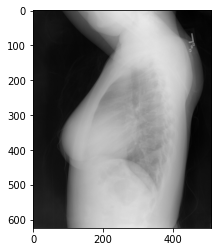

In [7]:
#A random sample from images 
img = cv2.imread('NLMCXR_png/CXR1_1_IM-0001-3001.png')

plt.imshow(img)

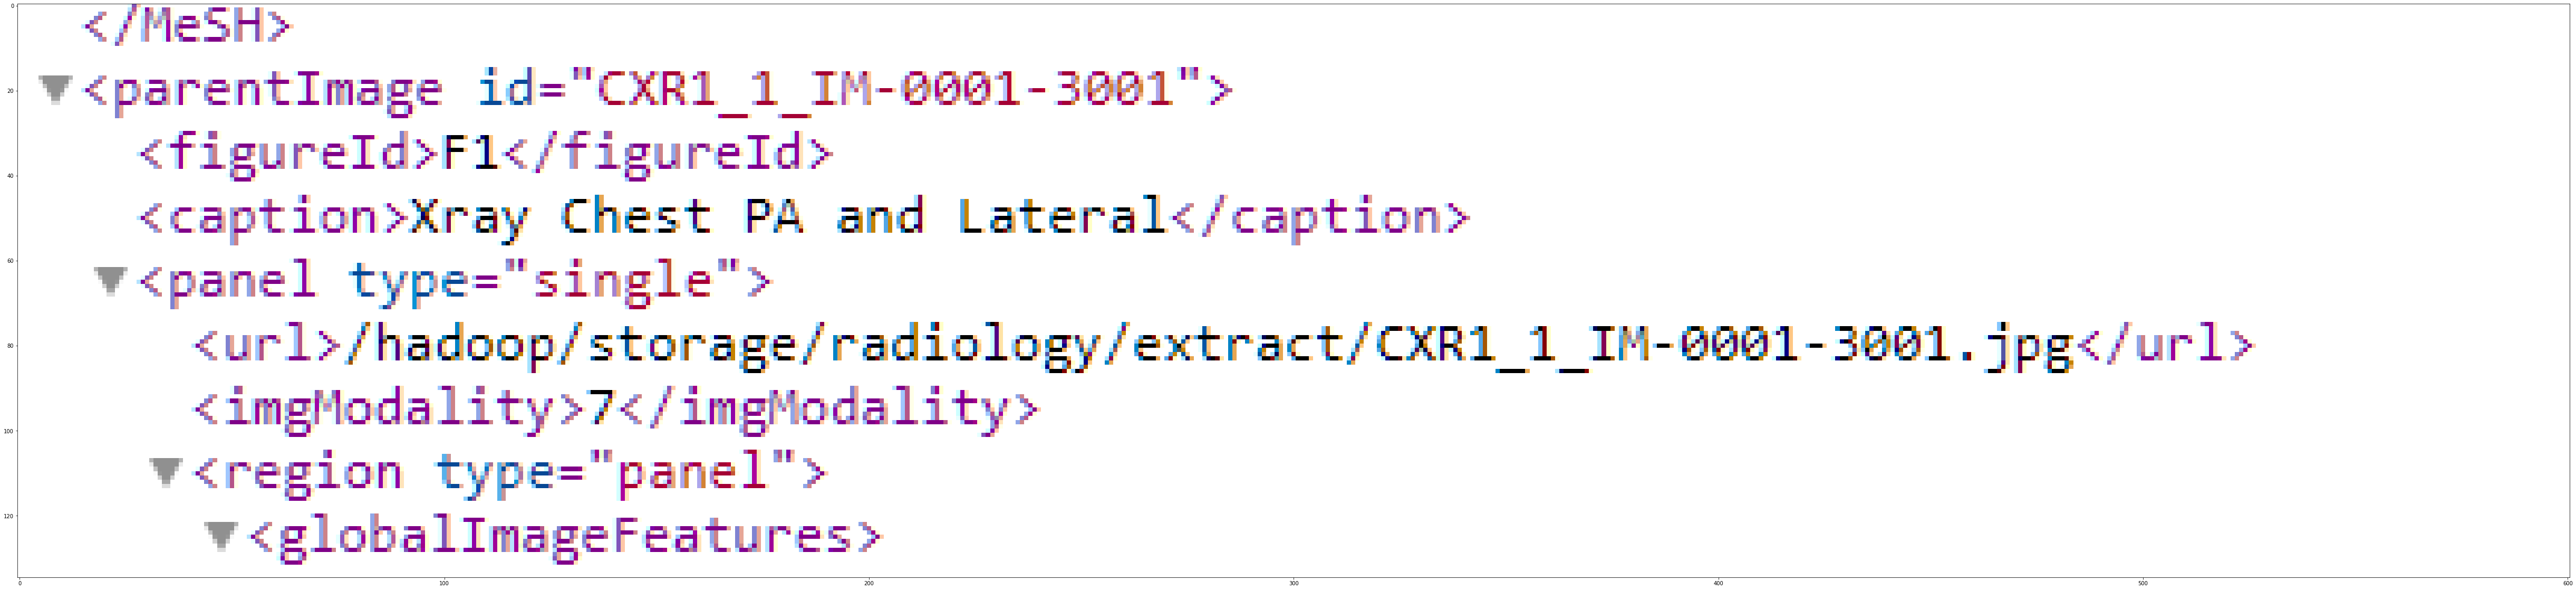

In [8]:
#A random sample from Reports.xml
img = cv2.imread('XML_Image.png')
plt.figure(figsize = (200,20))
plt.imshow(img)

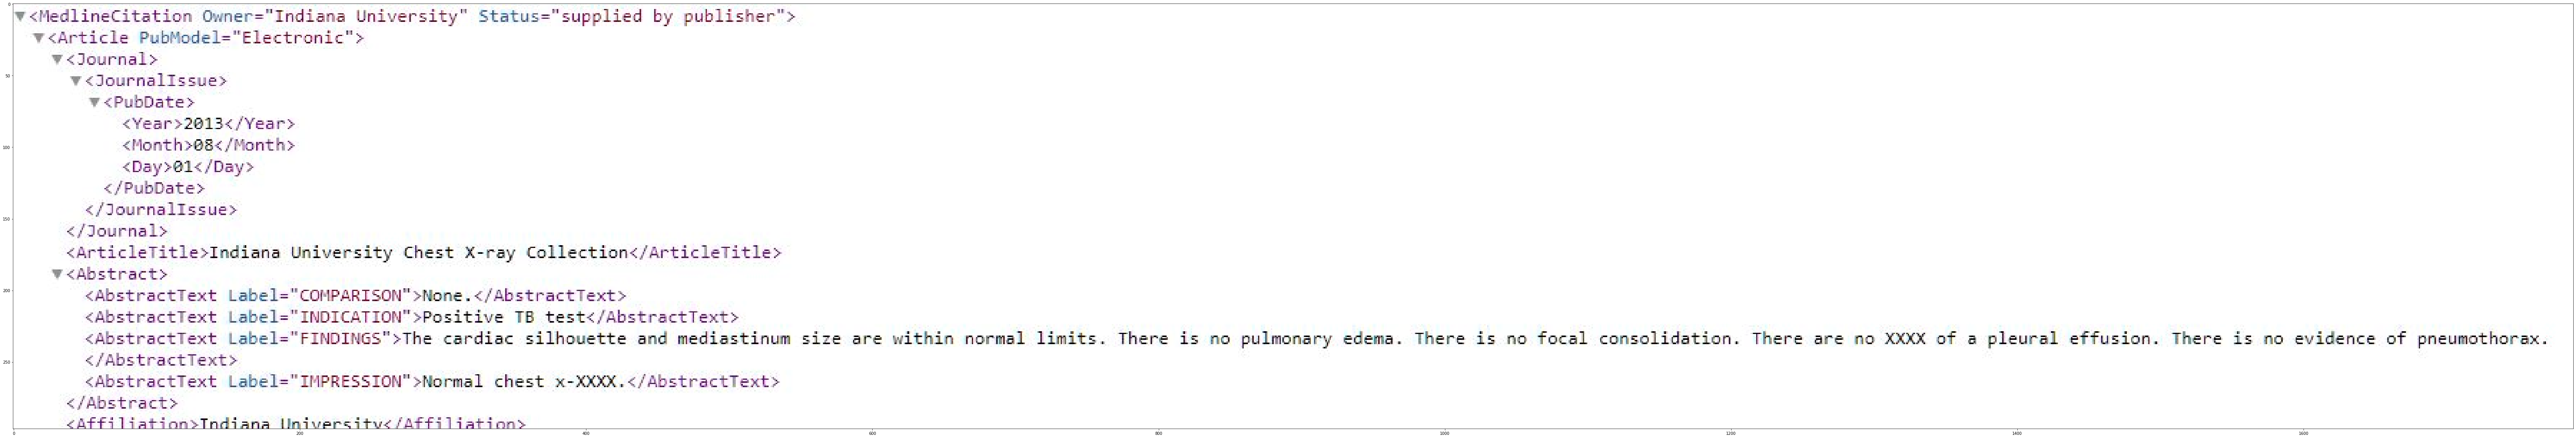

In [9]:
img = cv2.imread('Report.JPG')
plt.figure(figsize = (200,20))
plt.imshow(img)

In [10]:
#Extract the labels Findings,Indication and Impression according to the patient ids.
count=[]
indi=[]
impr=[]
find=[]
id=[]
for report in tqdm(os.listdir("ecgen-radiology")):
  #findings=""
  #impression=""
  #indication=""
  mytree = ET.parse("ecgen-radiology/" +report)
  myroot = mytree.getroot()
  #results = myroot.findall('MedlineCitation/Article/Abstract/AbstractText/')
  for child in myroot:
    #print(child.tag, child.attrib)
    if child.tag =="MedlineCitation":
      for elem in child:
        if elem.tag=="Article":
          for element in elem:
            if element.tag == "Abstract":
              for att in element:
                if att.get('Label')=='FINDINGS':
                  findings = att.text
                if att.get('Label')=='INDICATION':
                  indication=att.text
                if att.get('Label')=='IMPRESSION':
                  impression = att.text

 # for i in myroot.findall("parentImage"):
  #  find.append(findings)
   # impr.append(impression)
    #indi.append(indication)
  ic=0 
  #Extracting image IDs.
  for img_id in myroot.findall("parentImage"):
    id.append(img_id.get("id")+".png")
    find.append(findings)
    impr.append(impression)
    indi.append(indication)
    ic+=1
  count.append(ic) 
  #Data Frame
radiology = pd.DataFrame()
patientid=[]
imageid=[]
for i in id:
  patientid.append(i[0:20]) 
  
radiology["Patient_id"] = patientid
radiology["Image_id"] = ["NLMCXR_png/"+ i for i in id]
radiology["Findings"] = find
radiology["Impression"] = impr
radiology["Indictaion"] = indi
    

100%|██████████| 3955/3955 [01:18<00:00, 50.15it/s]  


In [11]:
print(find)  #Print Findings 

['The lungs are clear. No focal airspace consolidation. No pleural effusion or pneumothorax. Heart size is within normal limits.', 'The lungs are clear. No focal airspace consolidation. No pleural effusion or pneumothorax. Heart size is within normal limits.', None, 'The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. The previously seen right upper lobe mass lesion is not seen in XXXX study. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality.', 'The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. The previously seen right upper lobe mass lesion is not seen in XXXX study. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality.', "The cardiomediastinal silhouette appears irregular secondary to the diffuse bilateral pulmon

In [12]:
#Data Frame
radiology = pd.DataFrame() 
patientid=[]
imageid=[]
for i in id:
  patientid.append(i[0:20])
  
radiology["Patient_id"] = patientid
radiology["Image_id"] = ["NLMCXR_png/"+ i for i in id]
radiology["Findings"] = find
radiology["Impression"] = impr
radiology["Indictaion"] = indi


In [13]:
radiology.head() 

,Patient_id,Image_id,Findings,Impression,Indictaion
0,CXR367_IM-1826-1001.,NLMCXR_png/CXR367_IM-1826-1001.png,The lungs are clear. No focal airspace consoli...,Clear lungs.,XXXX-year-old XXXX with dyspnea
1,CXR367_IM-1826-1002.,NLMCXR_png/CXR367_IM-1826-1002.png,The lungs are clear. No focal airspace consoli...,Clear lungs.,XXXX-year-old XXXX with dyspnea
2,CXR3684_IM-1836-1001,NLMCXR_png/CXR3684_IM-1836-1001.png,None,2 views of the chest demonstrate sternotomy XX...,TOF
3,CXR3693_IM-1844-1001,NLMCXR_png/CXR3693_IM-1844-1001.png,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality.,"XXXX-year-old woman, XXXX.."
4,CXR3693_IM-1844-1002,NLMCXR_png/CXR3693_IM-1844-1002.png,"The lungs are clear bilaterally. Specifically,...",No acute cardiopulmonary abnormality.,"XXXX-year-old woman, XXXX.."


In [14]:
radiology.Image_id[0] 

'NLMCXR_png/CXR367_IM-1826-1001.png'

In [15]:
radiology.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_id  7470 non-null   object
 1   Image_id    7470 non-null   object
 2   Findings    6473 non-null   object
 3   Impression  7418 non-null   object
 4   Indictaion  7311 non-null   object
dtypes: object(5)
memory usage: 291.9+ KB


In [16]:
print(sum(radiology["Findings"].isnull()))
print(sum(radiology["Impression"].isnull()))
print(sum(radiology["Indictaion"].isnull()))

997
52
159


There are 470,31 and 93 null values in findings,imrepession and indication repectively.

In [17]:
radiology.shape

(7470, 5)

The dataframe contains 3736 rows and 5 colummns.

In [18]:
length=[]
for i in (radiology["Findings"]):
  try:
    length.append(len((i.split())))
  except:
    pass
print(length)
max(length)  #maximum lngth of the string

[19, 19, 44, 44, 65, 65, 53, 53, 37, 37, 32, 32, 35, 35, 33, 33, 21, 21, 80, 57, 57, 10, 10, 25, 25, 20, 24, 24, 42, 42, 18, 18, 10, 10, 40, 40, 26, 26, 23, 23, 10, 10, 38, 38, 29, 31, 31, 29, 29, 13, 13, 14, 14, 18, 18, 50, 50, 66, 66, 21, 21, 58, 58, 22, 22, 30, 30, 31, 23, 36, 36, 45, 45, 10, 10, 15, 15, 34, 34, 34, 30, 30, 30, 44, 44, 28, 28, 23, 23, 13, 13, 33, 33, 33, 33, 30, 30, 19, 19, 18, 18, 30, 30, 18, 18, 37, 37, 33, 33, 45, 45, 26, 26, 26, 34, 34, 27, 27, 39, 39, 15, 15, 23, 23, 40, 40, 57, 57, 49, 49, 35, 35, 19, 19, 18, 18, 23, 23, 28, 29, 29, 24, 24, 39, 24, 24, 30, 30, 37, 37, 37, 53, 43, 43, 49, 49, 25, 25, 36, 36, 57, 57, 40, 40, 31, 31, 27, 27, 28, 28, 40, 40, 16, 16, 28, 28, 20, 43, 43, 40, 40, 29, 15, 15, 30, 30, 41, 41, 41, 32, 32, 15, 15, 21, 21, 44, 44, 16, 16, 16, 29, 29, 27, 27, 35, 36, 36, 29, 29, 39, 39, 22, 22, 23, 23, 23, 47, 47, 75, 75, 16, 16, 71, 71, 28, 28, 23, 23, 32, 32, 30, 30, 24, 30, 30, 27, 27, 28, 28, 22, 22, 35, 35, 35, 15, 15, 18, 18, 52, 52,

169

The maximum length of the string in the findings is 169. We can fix the length ofthe string in the captions/report to be 169 and it is useful in padding.

Text(0.5, 1.0, 'Number of Images per report')

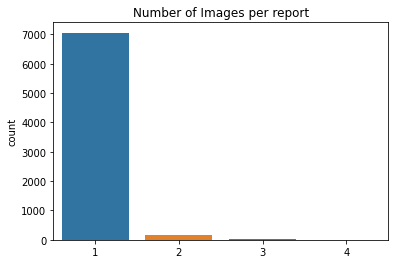

In [19]:
patient_image = dict()
for i in radiology["Patient_id"]:
  if i in patient_image:
    patient_image[i]+=1
  else:
    patient_image[i]=1

sns.countplot(list(patient_image.values()))
plt.title("Number of Images per report")


Most of the reports (that have been uploaded) have 1 image. But in actuality there were many reports that contain 2 images. 

**Text and Image Processing**

In [ ]:
replacements = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



In [ ]:
#Notaions like 're, 've etc have been replaced.
finding = radiology['Findings'].values

for i in range(len(finding)):
  break_down = str(finding[i]).split(" ")
  sentence=""
  for j in break_down:
     if j in replacements.keys():
       j = j.replace(j,replacements[j])
     else:
       j=j
     sentence = sentence+ j +" "
  finding[i] = sentence
  


In [ ]:
#Remove the Punctuations
def preprocesssing(sentence):
  sentence = str(sentence).lower()
  sentence = re.sub(r"[|\'||\\||/|?|$|.|.|,||;|><!&)(:`\n\t@#=+%^*~-]","",sentence)
  return sentence

for i in range(len(finding)):
  finding[i] = preprocesssing(finding[i])

radiology['Findings'] = finding

In [ ]:
#Text cleaning with "Impression"
impression = radiology['Impression'].values

for i in range(len(impression)):
  break_down = str(impression[i]).split(" ")
  sentence=""
  for j in break_down:
     if j in replacements.keys():
       j = j.replace(j,replacements[j])
     else:
       j=j
     sentence = sentence+ j +" "
  impression[i] = sentence
for i in range(len(impression)):
  impression[i] = preprocesssing(impression[i])

radiology['Impression'] = impression

In [ ]:
print(sum(radiology["Findings"].isnull()))
print(sum(radiology["Impression"].isnull()))
print(sum(radiology["Indictaion"].isnull()))

0
0
128


We can see that impressions can also indicte the findings and hence it can be used instead of findings in the cases where findings is null.

In [ ]:
find = radiology['Findings'].values
impr= radiology['Impression'].values
for i in range(len(find)):
  if find[i] == None:
    find[i] = impr[i]
radiology["Findings"] = find

In [ ]:
#Lets drop the impression and indication columns

radiology.drop(["Impression","Indictaion"],axis=1)

,Patient_id,Image_id,Findings
0,CXR2783_IM-1220-1001,NLMCXR_png/CXR2783_IM-1220-1001.png,no interval change is found in the bony thorax...
1,CXR2783_IM-1220-1002,NLMCXR_png/CXR2783_IM-1220-1002.png,no interval change is found in the bony thorax...
2,CXR2766_IM-1211-3001,NLMCXR_png/CXR2766_IM-1211-3001.png,none
3,CXR2766_IM-1211-4004,NLMCXR_png/CXR2766_IM-1211-4004.png,none
4,CXR2760_IM-1207-1001,NLMCXR_png/CXR2760_IM-1207-1001.png,there is minimal scarring within the left lung...
...,...,...,...
6265,CXR443_IM-2078-1002.,NLMCXR_png/CXR443_IM-2078-1002.png,heart size and mediastinal contour within norm...
6266,CXR3862_IM-1956-1001,NLMCXR_png/CXR3862_IM-1956-1001.png,none
6267,CXR3862_IM-1956-2001,NLMCXR_png/CXR3862_IM-1956-2001.png,none
6268,CXR3157_IM-1487-1001,NLMCXR_png/CXR3157_IM-1487-1001.png,heart size normal lungs are clear xxxx are nor...


In [ ]:
print(sum(radiology["Findings"].isnull()))

0


As few reports have 2 images, we have to align them in the same rows in the dataframe.

In [ ]:
p_id = radiology["Patient_id"]
p_id = list( dict.fromkeys(p_id) )
i_id = radiology["Image_id"]
li=[]
for i in (p_id):
  li.append((np.where(radiology["Patient_id"] == i))[0])

print(li)
image_list=[]
for i in li:
  li1=[]
  li1.append(radiology["Image_id"].iloc[i])
  image_list.append(li1)





[array([0]), array([1]), array([2]), array([3]), array([4]), array([5]), array([6]), array([7]), array([8]), array([9]), array([10]), array([11]), array([12]), array([13]), array([14]), array([15]), array([16]), array([17]), array([18]), array([19, 20]), array([21]), array([22]), array([23]), array([24]), array([25]), array([26]), array([27]), array([28]), array([29]), array([30]), array([31]), array([32]), array([33]), array([34]), array([35]), array([36]), array([37]), array([38, 39]), array([40]), array([41]), array([42]), array([43]), array([44]), array([45]), array([46]), array([47]), array([48]), array([49]), array([50]), array([51]), array([52]), array([53]), array([54]), array([55]), array([56]), array([57]), array([58]), array([59]), array([60]), array([61]), array([62]), array([63]), array([64]), array([65]), array([66]), array([67]), array([68]), array([69]), array([70]), array([71]), array([72]), array([73]), array([74]), array([75]), array([76]), array([77]), array([78]), 

In [ ]:
patient_dict=dict() #patientid:imageid
findings_dict=dict() #patientid:findings
for row in range(radiology.shape[0]):
  if radiology.iloc[row]["Patient_id"] in patient_dict:
    patient_dict[radiology.iloc[row]["Patient_id"]].append(radiology.iloc[row]["Image_id"])
  else:
    patient_dict[radiology.iloc[row]["Patient_id"]]=[radiology.iloc[row]["Image_id"]]

  findings_dict[radiology.iloc[row]["Patient_id"]]=[radiology.iloc[row]["Findings"]]


In [ ]:
#Ensuring that all the reports are tied with 2 images
imag1=[]
imag2=[]
findings=[]
patient_id=[]
for patient in patient_dict.keys():

  #if there is only one image for a person
  if len(patient_dict[patient])==1:
    img1=patient_dict[patient][0]
    img2=patient_dict[patient][0]

  #if there are two images for a person
  elif len(patient_dict[patient])==2:
    img1=patient_dict[patient][0]
    img2=patient_dict[patient][1]
  
  #if there are three images for a person
  elif len(patient_dict[patient])==3:
    a=np.random.choice([0,1,2],2)
    img1=patient_dict[patient][a[0]]
    img2=patient_dict[patient][a[1]]

  #if there are four images for a person
  elif len(patient_dict[patient])==4:
    a=np.random.choice([0,1,2,3],2)
    img1=patient_dict[patient][a[0]]
    img2=patient_dict[patient][a[1]]
    
  imag1.append(img1)
  imag2.append(img2)
  findings.append(findings_dict[patient][0])
  patient_id.append(patient)

In [ ]:
radiology_df=pd.DataFrame()
radiology_df["Patient_id"]=patient_id
radiology_df["Image1"]=imag1
radiology_df["Image2"]=imag2
radiology_df["Report"]=findings
radiology_df.to_csv("radiology.csv")  #Writing the dataframe as csv to the drive

In [ ]:
radiology_df.Image1[0]

'NLMCXR_png/CXR2783_IM-1220-1001.png'

In [ ]:
from sklearn.model_selection import train_test_split
radiology_df = pd.read_csv("radiology.csv")

In [ ]:
dfw = radiology_df["Report"].value_counts()

In [ ]:
radiology_df = radiology_df.merge(dfw,
         left_on = 'Report',
         right_index=True) #join left impression value with right index

radiology_df.columns

Index(['Report', 'Unnamed: 0', 'Patient_id', 'Image1', 'Image2', 'Report_x',
       'Report_y'],
      dtype='object')

We can see that the distribution of impression values are not equal.

In [ ]:
radiology_df=radiology_df.drop(columns=['Report_x'])
radiology_df=radiology_df.rename(columns={"Report_y": "Report_valuecounts"})
radiology_df=radiology_df.drop(columns=['Unnamed: 0'])


In [ ]:
print(sum(radiology_df['Report_valuecounts']>=100))
print(sum(radiology_df['Report_valuecounts']<=5))
print(len(radiology_df[(radiology_df['Report_valuecounts']>5)&(radiology_df['Report_valuecounts']<100)] ))

756
4036
1304


Upsample the records that has value_counts>5 and <100

In [ ]:

from sklearn.utils import resample
small_sample = radiology_df[(radiology_df['Report_valuecounts']>5)&(radiology_df['Report_valuecounts']<100)] 
small_sample_upsampled = resample(small_sample,replace = True,n_samples = 4*(small_sample.shape[0]),random_state = 200)  #2524/440 ~4
smallest_sample =radiology_df[radiology_df['Report_valuecounts']>=100]
smallest_sample_upsampled = resample(smallest_sample,replace = True,n_samples = 5*(small_sample.shape[0]),random_state = 200) #2524/661~5

In [ ]:
small_sample.shape

(1304, 5)

In [ ]:
radiology_df1 =radiology_df.drop(small_sample.index,axis=0) #dropped 661 records
radiology_df1 =radiology_df1.drop(smallest_sample.index,axis=0) #dropped 440 records

In [ ]:
radiology_df1 = pd.concat([radiology_df1,small_sample_upsampled,smallest_sample_upsampled])

In [ ]:
#Text Preprocessing
#reate a vocabulary list
def vocabulary(sent):
  vocab=[]
  for i in sent:
    vocab.extend(i.split())
  print("Number of words in the vocab",len(set(vocab)))
  return vocab
vocabulary = vocabulary(radiology_df1.Report.values)


Number of words in the vocab 1619


In [ ]:
##Create a vocabulary count dictionary

def vocab_dicti(sent):
  vocab_dict=dict()
  for i in vocabulary:
    
    if i in vocab_dict.keys():
      vocab_dict[i]= vocab_dict[i]+1
    else:
      vocab_dict[i]=1

  return vocab_dict
vocab_dictionary = vocab_dicti(radiology_df1.Report.values)

sorted_vocab = sorted(vocab_dictionary.items(), key=lambda kv: kv[1], reverse= True)
print(sorted_vocab)

[('the', 14981), ('are', 12703), ('no', 10923), ('normal', 10149), ('is', 9717), ('and', 7975), ('none', 6520), ('or', 6478), ('lungs', 6459), ('pleural', 6342), ('pneumothorax', 6293), ('heart', 5925), ('effusion', 5796), ('of', 5208), ('size', 5125), ('xxxx', 5051), ('clear', 5003), ('there', 4591), ('within', 4518), ('limits', 4427), ('focal', 4421), ('in', 3160), ('pulmonary', 3102), ('silhouette', 2628), ('consolidation', 2586), ('mediastinal', 2439), ('cardiomediastinal', 2213), ('acute', 2031), ('mediastinum', 1948), ('airspace', 1927), ('structures', 1866), ('unremarkable', 1852), ('contour', 1598), ('bony', 1575), ('contours', 1471), ('disease', 1425), ('right', 1403), ('osseous', 1291), ('without', 1261), ('intact', 1216), ('left', 1175), ('abnormality', 1174), ('vascularity', 1164), ('lung', 1121), ('effusions', 1095), ('cardiac', 1087), ('for', 1048), ('with', 1041), ('evidence', 1032), ('appear', 1032), ('large', 985), ('stable', 977), ('spine', 969), ('changes', 944), ('t

{'the': 14981, 'are': 12703, 'no': 10923, 'normal': 10149, 'is': 9717, 'and': 7975, 'none': 6520, 'or': 6478, 'lungs': 6459, 'pleural': 6342, 'pneumothorax': 6293, 'heart': 5925, 'effusion': 5796, 'of': 5208, 'size': 5125, 'xxxx': 5051, 'clear': 5003, 'there': 4591, 'within': 4518, 'limits': 4427, 'focal': 4421, 'in': 3160, 'pulmonary': 3102, 'silhouette': 2628, 'consolidation': 2586, 'mediastinal': 2439, 'cardiomediastinal': 2213, 'acute': 2031, 'mediastinum': 1948, 'airspace': 1927, 'structures': 1866, 'unremarkable': 1852, 'contour': 1598, 'bony': 1575, 'contours': 1471, 'disease': 1425, 'right': 1403, 'osseous': 1291, 'without': 1261, 'intact': 1216, 'left': 1175, 'abnormality': 1174, 'vascularity': 1164, 'lung': 1121, 'effusions': 1095, 'cardiac': 1087, 'for': 1048, 'with': 1041, 'evidence': 1032, 'appear': 1032}


<BarContainer object of 50 artists>

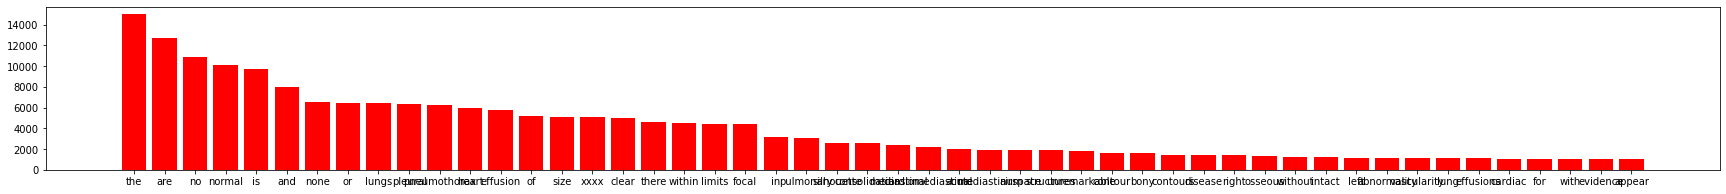

In [ ]:
#Histogram of top 50 words
def Convert(lst):
  vocab=dict()
  for i in range(0,50):
    
    for j in lst[i]:
      
      vocab[lst[i][0]] = lst[i][1]
      
    
  return vocab

vocab = Convert(sorted_vocab)
print(vocab)
plt.figure(figsize=(30,3))
plt.bar(vocab.keys(), vocab.values(), color='r')


In [ ]:
#Removing all the stop words except "no" and "not"
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stop_words(text):
  
    stop_words = set(stopwords.words('english'))  
    stop_words.remove('no')                           
    stop_words.remove('not')
    word_tokens = word_tokenize(text)  
    
    sentence = []  
    for w in word_tokens:  
        if w not in stop_words:  
            sentence.append(w)  
        
    return " ".join(sentence)
li=[] 
for i in radiology_df1.Report.values:
  li.append(remove_stop_words(i))
radiology_df1["Report"]= li
radiology_df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Report,Patient_id,Image1,Image2,Report_valuecounts
0,no interval change found bony thorax heart siz...,CXR2783_IM-1220-1001,NLMCXR_png/CXR2783_IM-1220-1001.png,NLMCXR_png/CXR2783_IM-1220-1001.png,2
1,no interval change found bony thorax heart siz...,CXR2783_IM-1220-1002,NLMCXR_png/CXR2783_IM-1220-1002.png,NLMCXR_png/CXR2783_IM-1220-1002.png,2
4,minimal scarring within left lung base lungs o...,CXR2760_IM-1207-1001,NLMCXR_png/CXR2760_IM-1207-1001.png,NLMCXR_png/CXR2760_IM-1207-1001.png,2
5,minimal scarring within left lung base lungs o...,CXR2760_IM-1207-2001,NLMCXR_png/CXR2760_IM-1207-2001.png,NLMCXR_png/CXR2760_IM-1207-2001.png,2
8,frontal lateral views chest show unchanged car...,CXR2758_IM-1206-1001,NLMCXR_png/CXR2758_IM-1206-1001.png,NLMCXR_png/CXR2758_IM-1206-1001.png,1


In [ ]:
#Adding the start and end tags to every findings.
def add_tags(text):
  text1=[]
  for i in text:
    i = ' '+ i +" "
    text1.append(i)
  return text1
radiology_df1["Report"] = add_tags(radiology_df1.Report.values)

In [ ]:
def add_in_tags(text):
  text1=[]
  for i in text:
    i = ' '+ i 
    text1.append(i)
  return text1
radiology_df1["Report_in"] = add_tags(radiology_df1.Report.values)

In [ ]:
def add_out_tags(text):
  text1=[]
  for i in text:
    i =  i +' '
    text1.append(i)
  return text1
radiology_df1["Report_out"] = add_tags(radiology_df1.Report.values)

In [ ]:
max_len=29
tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='',oov_token = '')

tokenizer.fit_on_texts(radiology_df1.Report)
vocab_size=len(tokenizer.word_index)+1 

seq_in=tokenizer.texts_to_sequences(radiology_df1.Report_in)
padded_inp=tf.keras.preprocessing.sequence.pad_sequences(seq_in,maxlen=max_len,padding="post")
print(padded_inp.shape)

seq_out=tokenizer.texts_to_sequences(radiology_df1.Report_out)
padded_out=tf.keras.preprocessing.sequence.pad_sequences(seq_out,maxlen=max_len,padding="post")
#caption_out = tf.squeeze(padded_out,axis=0)

(15772, 29)


In [ ]:
train,test = sklearn.model_selection.train_test_split(radiology_df1, test_size=0.1, random_state=420, shuffle=True)

In [ ]:
print(train.shape)
print(test.shape)

(14194, 7)
(1578, 7)


In [ ]:
train=train.drop(["Report_valuecounts"],axis=1)
test=test.drop(["Report_valuecounts"],axis=1)

In [ ]:
'''train["Image1"] = train["Image1"]
train["Image2"] = 'NLMCXR_png1/'+ train["Image2"]
test["Image1"] = 'NLMCXR_png1/'+ test["Image1"]
test["Image2"] = 'NLMCXR_png1/'+ test["Image2"]'''
train

In [ ]:

train.to_pickle(os.path.join('/content/gdrive/MyDrive/Colab Notebooks/','train.pkl'))
test.to_pickle(os.path.join('/content/gdrive/MyDrive/Colab Notebooks/','test.pkl'))
